In [1]:
# ================================
# Hackney Gelato Market Overview
# ================================

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression

sns.set(style="whitegrid")
np.random.seed(42)

In [2]:
# Regions
regions = ['London', 'Nationwide UK', 'Europe', 'Global']

# Sales Channels
channels = [
    'Wholesale Restaurants',
    'Retail Chains',
    'Independent Retail',
    'Online Direct'
]

# Demographics
age_groups = ['18-24', '25-34', '35-44', '45-54', '55+']
income_levels = ['Low', 'Medium', 'High']
household_sizes = ['1', '2', '3-4', '5+']
purchase_frequency = ['Weekly', 'Monthly', 'Occasional']

In [6]:
import pandas as pd

# Monthly data from 2021–2023 (Month End frequency)
dates = pd.date_range(start='2021-01-01', end='2023-12-31', freq='ME')

# Base monthly revenue assumptions (£)
base_sales_by_region = {
    'London': 200_000,
    'Nationwide UK': 150_000,
    'Europe': 80_000,
    'Global': 50_000,
}

# Gross margin assumptions by channel
gross_margin_by_channel = {
    'Wholesale Restaurants': 0.25,
    'Retail Chains': 0.30,
    'Independent Retail': 0.35,
    'Online Direct': 0.40,
}

In [7]:
rows = []

for date in dates:
    for region in regions:
        
        # Seasonality factor (summer boost)
        month = date.month
        season_multiplier = 1 + 0.15 * np.sin(2 * np.pi * (month-1)/12)
        
        for channel in channels:
            
            base = base_sales_by_region[region]
            
            # Quarterly growth (1% per quarter)
            quarters_since_start = (date.year - dates[0].year)*4 + (date.quarter - 1)
            growth_multiplier = 1 + 0.01 * quarters_since_start
            
            sales = base * season_multiplier * growth_multiplier
            sales *= np.random.uniform(0.9, 1.1)
            
            margin = gross_margin_by_channel[channel]
            profit = sales * margin
            
            # Generate demographic distributions
            age_dist = np.random.dirichlet(np.ones(len(age_groups)))
            income_dist = np.random.dirichlet(np.ones(len(income_levels)))
            household_dist = np.random.dirichlet(np.ones(len(household_sizes)))
            freq_dist = np.random.dirichlet(np.ones(len(purchase_frequency)))
            
            rows.append({
                'date': date,
                'region': region,
                'channel': channel,
                'sales_gbp': sales,
                'gross_margin_pct': margin * 100,
                'profit_gbp': profit,
                'age_dist': age_dist,
                'income_dist': income_dist,
                'household_dist': household_dist,
                'frequency_dist': freq_dist,
            })

df = pd.DataFrame(rows)

df.head()

,date,region,channel,sales_gbp,gross_margin_pct,profit_gbp,age_dist,income_dist,household_dist,frequency_dist
0,2021-01-31,London,Wholesale Restaurants,201474.728719,25.0,50368.682180,"[0.44631262149381434, 0.3461462347287426, 0.02...","[0.22562147711943512, 0.0920146284881392, 0.68...","[0.44964700395830515, 0.08833850837507147, 0.3...","[0.6321077515022573, 0.3059682284248762, 0.061..."
1,2021-01-31,London,Retail Chains,217117.368049,30.0,65135.210415,"[0.24077926697873903, 0.5274878429761617, 0.18...","[0.3027994706788822, 0.5171984140216238, 0.180...","[0.2775575979340531, 0.27998263992172895, 0.28...","[0.6598449646039422, 0.17991333729935602, 0.16..."
2,2021-01-31,London,Independent Retail,187975.232760,35.0,65791.331466,"[0.17820933867158345, 0.020966437135578633, 0....","[0.6862120659677673, 0.18461037271053046, 0.12...","[0.0765322073479119, 0.6161694657776488, 0.057...","[0.24611463702689698, 0.40472350143312535, 0.3..."
3,2021-01-31,London,Online Direct,212428.826918,40.0,84971.530767,"[0.037366675489366806, 0.28696331965500893, 0....","[0.1686340317172277, 0.33565580947611134, 0.49...","[0.19165664601329624, 0.5077193798030843, 0.16...","[0.8790948420640378, 0.02708219450469648, 0.09..."
4,2021-01-31,Nationwide UK,Wholesale Restaurants,147539.086308,25.0,36884.771577,"[0.38563504760086326, 0.17218233335196126, 0.0...","[0.297038875980489, 0.5400687061121823, 0.1628...","[0.09870567520675287, 0.28284191151740906, 0.3...","[0.13586389106354946, 0.48468385463087027, 0.3..."


In [8]:
def expand_dist(df, column, labels):
    dist_array = np.vstack(df[column])
    dist_df = pd.DataFrame(dist_array, columns=[f"{column}_{label}" for label in labels])
    df = pd.concat([df.reset_index(drop=True), dist_df], axis=1)
    return df.drop(columns=[column])

df = expand_dist(df, 'age_dist', age_groups)
df = expand_dist(df, 'income_dist', income_levels)
df = expand_dist(df, 'household_dist', household_sizes)
df = expand_dist(df, 'frequency_dist', purchase_frequency)

df.head()

,date,region,channel,sales_gbp,gross_margin_pct,profit_gbp,age_dist_18-24,age_dist_25-34,age_dist_35-44,age_dist_45-54,...,income_dist_Low,income_dist_Medium,income_dist_High,household_dist_1,household_dist_2,household_dist_3-4,household_dist_5+,frequency_dist_Weekly,frequency_dist_Monthly,frequency_dist_Occasional
0,2021-01-31,London,Wholesale Restaurants,201474.728719,25.0,50368.682180,0.446313,0.346146,0.025188,0.018032,...,0.225621,0.092015,0.682364,0.449647,0.088339,0.378951,0.083064,0.632108,0.305968,0.061924
1,2021-01-31,London,Retail Chains,217117.368049,30.0,65135.210415,0.240779,0.527488,0.182006,0.007582,...,0.302799,0.517198,0.180002,0.277558,0.279983,0.284125,0.158335,0.659845,0.179913,0.160242
2,2021-01-31,London,Independent Retail,187975.232760,35.0,65791.331466,0.178209,0.020966,0.486565,0.138493,...,0.686212,0.184610,0.129178,0.076532,0.616169,0.057411,0.249887,0.246115,0.404724,0.349162
3,2021-01-31,London,Online Direct,212428.826918,40.0,84971.530767,0.037367,0.286963,0.268263,0.128825,...,0.168634,0.335656,0.495710,0.191657,0.507719,0.163660,0.136964,0.879095,0.027082,0.093823
4,2021-01-31,Nationwide UK,Wholesale Restaurants,147539.086308,25.0,36884.771577,0.385635,0.172182,0.012426,0.252253,...,0.297039,0.540069,0.162892,0.098706,0.282842,0.313768,0.304685,0.135864,0.484684,0.379452


In [9]:
# Total Sales by Region
sales_by_region = df.groupby(['date', 'region'])['sales_gbp'].sum().unstack()

# Average Margin by Channel
avg_margin = df.groupby('channel')['gross_margin_pct'].mean()

print("Average Gross Margin by Channel:")
print(avg_margin)

Average Gross Margin by Channel:
channel
Independent Retail       35.0
Online Direct            40.0
Retail Chains            30.0
Wholesale Restaurants    25.0
Name: gross_margin_pct, dtype: float64


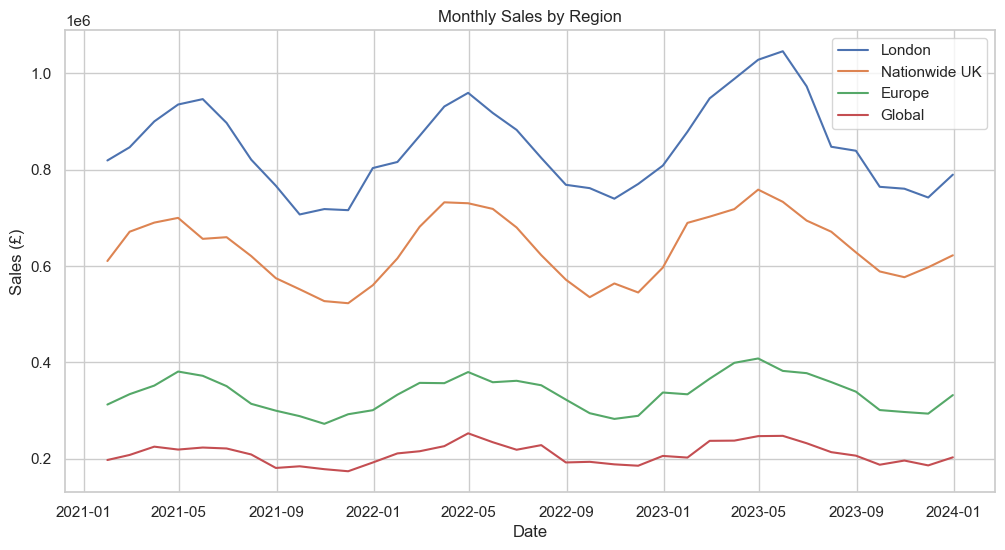

In [10]:
plt.figure(figsize=(12,6))

for region in regions:
    plt.plot(sales_by_region.index, sales_by_region[region], label=region)

plt.title("Monthly Sales by Region")
plt.xlabel("Date")
plt.ylabel("Sales (£)")
plt.legend()
plt.show()

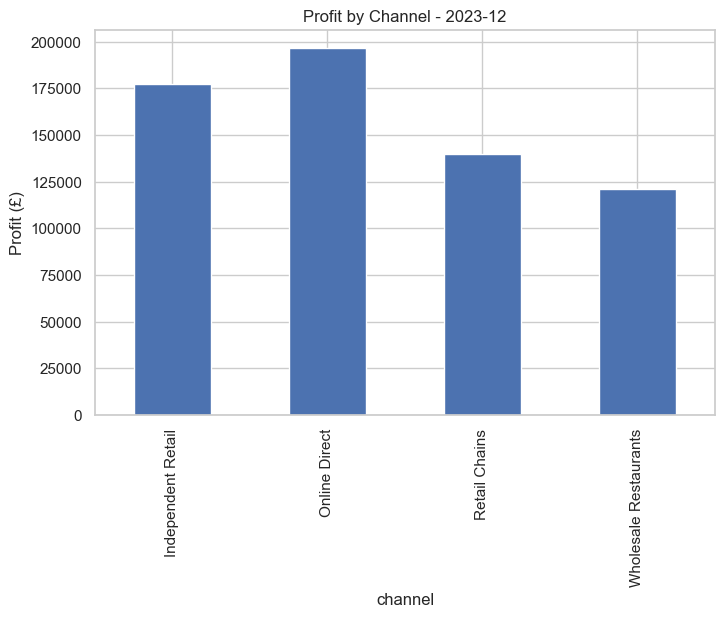

In [11]:
latest_date = df['date'].max()
latest_data = df[df['date'] == latest_date]

profit_by_channel = latest_data.groupby('channel')['profit_gbp'].sum()

plt.figure(figsize=(8,5))
profit_by_channel.plot(kind='bar')
plt.title(f"Profit by Channel - {latest_date.strftime('%Y-%m')}")
plt.ylabel("Profit (£)")
plt.show()

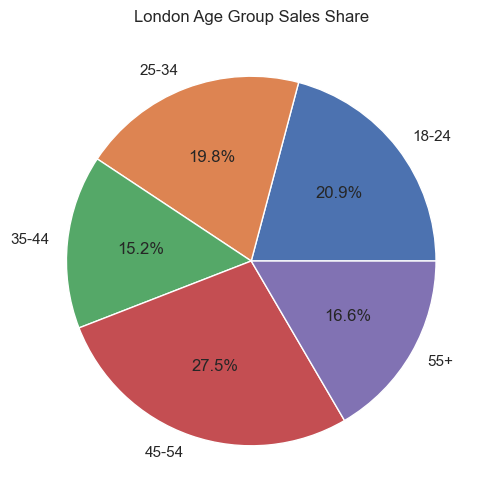

In [12]:
def weighted_share(data, prefix, labels):
    results = {}
    for label in labels:
        results[label] = (data['sales_gbp'] * data[f"{prefix}_{label}"]).sum()
    total = sum(results.values())
    return {k: (v/total)*100 for k, v in results.items()}

london_latest = latest_data[latest_data['region'] == 'London']

age_share = weighted_share(london_latest, 'age_dist', age_groups)

plt.figure(figsize=(6,6))
plt.pie(age_share.values(), labels=age_share.keys(), autopct='%1.1f%%')
plt.title("London Age Group Sales Share")
plt.show()

In [14]:
import pandas as pd
from sklearn.linear_model import LinearRegression

# Build a clean time series for the region
region_series = sales_by_region[['Nationwide UK']].reset_index().rename(columns={'index': 'date'})
region_series['date'] = pd.to_datetime(region_series['date'])

# Features/target
X = region_series['date'].map(pd.Timestamp.toordinal).to_numpy().reshape(-1, 1)
y = region_series['Nationwide UK'].to_numpy()

# Fit model
model = LinearRegression()
model.fit(X, y)

# Forecast next 12 month-ends AFTER the last observed date
last_date = region_series['date'].max()
future_dates = pd.date_range(
    start=last_date + pd.offsets.MonthEnd(1),
    periods=12,
    freq='ME'  # Month End (replacement for deprecated 'M')
)

X_future = future_dates.map(pd.Timestamp.toordinal).to_numpy().reshape(-1, 1)
forecast = model.predict(X_future)

forecast_df = pd.DataFrame({
    'date': future_dates,
    'forecast_sales_gbp': forecast
})

forecast_df.head()

,date,forecast_sales_gbp
0,2024-01-31,644079.885658
1,2024-02-29,644470.765074
2,2024-03-31,644888.601690
3,2024-04-30,645292.959707
4,2024-05-31,645710.796323


In [15]:
df.to_csv("hackney_gelato_market_overview_synthetic.csv", index=False)

print("Dataset exported successfully.")

Dataset exported successfully.
